<a href="https://colab.research.google.com/github/Gabriel-Mourad/Madurity-lemon-estimator-TFG/blob/main/VGG_16_TRAIN_pelotas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!pip3 uninstall keras
!pip3 install keras==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 16.7 MB/s 


In [1]:
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  after removing the cwd from sys.path.
Using TensorFlow backend.


In [5]:
!pip3 install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import opendatasets as od

In [15]:
os.chdir("/gdrive/MyDrive/TFM/DataSet/vgg_data")
od.download("https://www.kaggle.com/datasets/biancaferreira/african-wildlife")

Skipping, found downloaded files in "./african-wildlife" (use force=True to force download)


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


Not connected to a GPU


In [16]:
# Directorio de trabajo
ROOT_DIR = '/gdrive/MyDrive/TFM'

os.chdir(ROOT_DIR)
DATA_DIR = "/gdrive/MyDrive/TFM/DataSet/vgg_data"

DATASET_RIGHT = os.path.join(DATA_DIR, 'RIGHT')
DATASET_LEFT = os.path.join(DATA_DIR, 'LEFT')
DATASET_CENTER = os.path.join(DATA_DIR, 'CENTER')
DATASET_DESTINO = os.path.join(DATA_DIR, "DESTINO")
DATASET_VALIDATION = os.path.join(DATA_DIR, "VALIDATION")

In [17]:
X = [] #GUARDAMOS IMAGENES
y = [] #GUARDAMOS LABEL

os.chdir(DATASET_RIGHT)
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append("RIGHT")

os.chdir(DATASET_LEFT)
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append("LEFT")

os.chdir(DATASET_CENTER)
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append("CENTER")

os.chdir(DATASET_DESTINO)
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append("DESTINO")


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

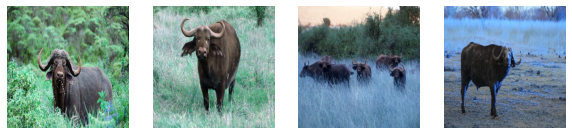

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [20]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (13, 224, 224, 3)
X_test Shape:  (7, 224, 224, 3)
y_train Shape:  (13, 2)
y_test Shape:  (7, 2)


In [21]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224 


vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [2]:
from keras.applications import vgg16

In [22]:
# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

In [25]:
# Let's print our layers 
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model, num_classes):
#   """creates the top or head of the model that will be 
#   placed ontop of the bottom layers"""

      top_model = bottom_model.output
      top_model = GlobalAveragePooling2D()(top_model)
      top_model = Dense(1024,activation='relu')(top_model)
      top_model = Dense(1024,activation='relu')(top_model)
      top_model = Dense(512,activation='relu')(top_model)
      top_model = Dense(num_classes,activation='softmax')(top_model)
      return top_model 

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


In [29]:
num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [31]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=3, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)
os.chdir(ROOT_DIR)
model.save("pelotas_model")

Epoch 1/3
1/1 [==============================] - 11s 11s/step - loss: 21.7571 - accuracy: 0.5385 - val_loss: 1.3893 - val_accuracy: 0.5714
Epoch 2/3
1/1 [==============================] - 9s 9s/step - loss: 0.3369 - accuracy: 0.8462 - val_loss: 1.4640 - val_accuracy: 0.5714
Epoch 3/3
1/1 [==============================] - 9s 9s/step - loss: 0.2179 - accuracy: 0.8462 - val_loss: 0.0525 - val_accuracy: 1.0000


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

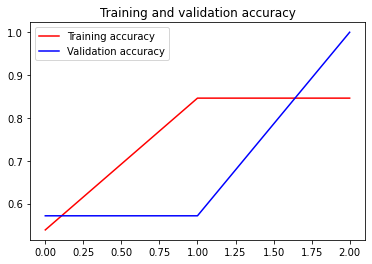

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


INFERENCE

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model
from tensorflow.keras.models import Model, load_model
from keras.applications import vgg16

%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
# Directorio de trabajo
ROOT_DIR = '/gdrive/MyDrive/TFM'

os.chdir(ROOT_DIR)
DATA_DIR = "/gdrive/MyDrive/TFM/DataSet/vgg_data"

DATASET_VALIDATION = os.path.join(DATA_DIR, "VALIDATION")

In [62]:
X_val = [] #GUARDAMOS IMAGENES

os.chdir(DATASET_VALIDATION)
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X_val.append(img)

  0%|          | 0/2 [00:00<?, ?it/s]

In [63]:
X_val = np.array(X_val)
print("X_val Shape: ", X_val.shape) 

X_val Shape:  (2, 224, 224, 3)


In [58]:
#Resizing images
images = np.resize(X_val,(2, 224, 224, 3))
#Normalizing images
images = np.array(images, dtype="float") / 255.0

In [64]:
os.chdir(ROOT_DIR)
modelo = load_model("pelotas_model")

In [65]:
X_val[0].shape

(224, 224, 3)

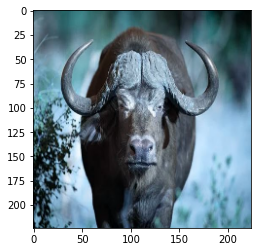

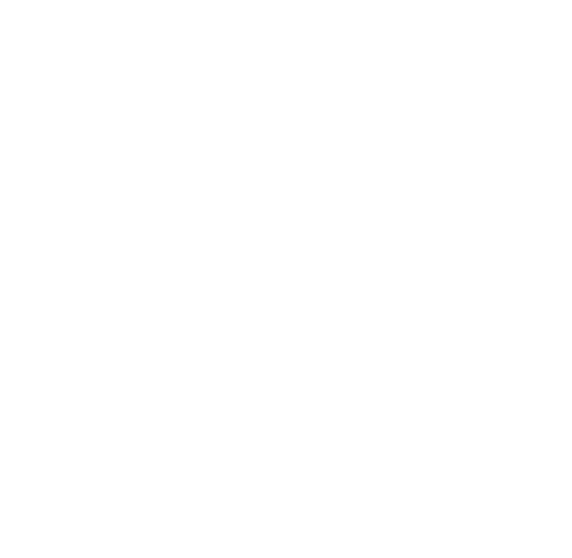

In [66]:
plt.imshow(X_val[0], cmap="gray")
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.show()


In [68]:
y_hat = modelo.predict(X_val)

1/1 [==============================] - 1s 1s/step


array([[0.44729382, 0.55270624],
       [0.99129105, 0.00870896]], dtype=float32)

In [ ]:
# si hacemos coincidir cada clase con su posicion en el vector (0 1 2 ö 3), 
# buscando la posicion de la probabilidad maxima obtenemos la clasificacion del modelo
y_calss = np.argmax(y_hat[i])

CONFUSSION MATRIX

In [ ]:
# from pretty_confusion_matrix import pp_matrix_from_data
# de esta libreria tambien se puede obtener una matriz de confusion muy bonita

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_class) # LE PASamos los vectores correspondientes a las etiquetas
                                  # y el vector de clsificaciones predecidas